# Taxi-v3: Brute-Force Algorithm
The following notebook solves the taxi-v3 environement from the OpenAI gym library, using a brute-force method.

In [14]:
import gym
import matplotlib.pyplot as plt
import torch
import numpy as np

In [15]:
env = gym.make("Taxi-v3").env
env.reset()

253

In [23]:
# RESULTS
rewards_per_ep_total = []
steps_per_ep_total = []
penalties_per_ep_total = []

In [24]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def show_run_stats():
    # Rewards over episodes
    plt.figure(figsize=(12,5))
    plt.title("Rewards over steps")
    plt.bar(torch.arange(len(rewards_per_ep_total)), rewards_per_ep_total, alpha=0.6, color='green', width=5)
    ma = moving_average(rewards_per_ep_total, n=15)
    plt.plot(torch.arange(len(ma)), ma)
    # plt.plot()
    plt.show()

    plt.figure(figsize=(12,5))
    plt.title("Steps over episode")
    # plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='red', width=5)
    plt.bar(torch.arange(len(steps_per_ep_total)), steps_per_ep_total)
    plt.show()

    plt.figure(figsize=(12,5))
    plt.title("Penalties per episode")
    plt.plot(torch.arange(len(penalties_per_ep_total)), penalties_per_ep_total)
    plt.show()


In [32]:
def brute_force(episodes):

    for episode in range(episodes):
        state = env.reset()
        steps = 0
        done = False
        total_rewards = 0
        total_penalties = 0

        while not done:
            action = env.action_space.sample()
            state, reward, done, _ = env.step(action)

            total_rewards += reward
            steps += 1

            if reward == -10: # for wrong pickup/dropoffs
                total_penalties += 1

        steps_per_ep_total.append(steps)
        rewards_per_ep_total.append(total_rewards)
        penalties_per_ep_total.append(total_penalties)


    print("Bruteforcing taxi-v3...")
    print("Starting State: " + str(env.s) + "\n")
    print("Total Steps to Completion: " + str(steps))
    print("Penalties (Incorrect dropoff/pickup): " + str(total_penalties))
    show_run_stats()

EPISODE:  0
EPISODE:  1
EPISODE:  2
EPISODE:  3
EPISODE:  4
EPISODE:  5
EPISODE:  6
EPISODE:  7
EPISODE:  8
EPISODE:  9
EPISODE:  10
EPISODE:  11
EPISODE:  12
EPISODE:  13
EPISODE:  14
EPISODE:  15
EPISODE:  16
EPISODE:  17
EPISODE:  18
EPISODE:  19
EPISODE:  20
EPISODE:  21
EPISODE:  22
EPISODE:  23
EPISODE:  24
EPISODE:  25
EPISODE:  26
EPISODE:  27
EPISODE:  28
EPISODE:  29
EPISODE:  30
EPISODE:  31
EPISODE:  32
EPISODE:  33
EPISODE:  34
EPISODE:  35
EPISODE:  36
EPISODE:  37
EPISODE:  38
EPISODE:  39
EPISODE:  40
EPISODE:  41
EPISODE:  42
EPISODE:  43
EPISODE:  44
EPISODE:  45
EPISODE:  46
EPISODE:  47
EPISODE:  48
EPISODE:  49
EPISODE:  50
EPISODE:  51
EPISODE:  52
EPISODE:  53
EPISODE:  54
EPISODE:  55
EPISODE:  56
EPISODE:  57
EPISODE:  58
EPISODE:  59
EPISODE:  60
EPISODE:  61
EPISODE:  62
EPISODE:  63
EPISODE:  64
EPISODE:  65
EPISODE:  66
EPISODE:  67
EPISODE:  68
EPISODE:  69
EPISODE:  70
EPISODE:  71
EPISODE:  72
EPISODE:  73
EPISODE:  74
EPISODE:  75
EPISODE:  76
EPISODE: 

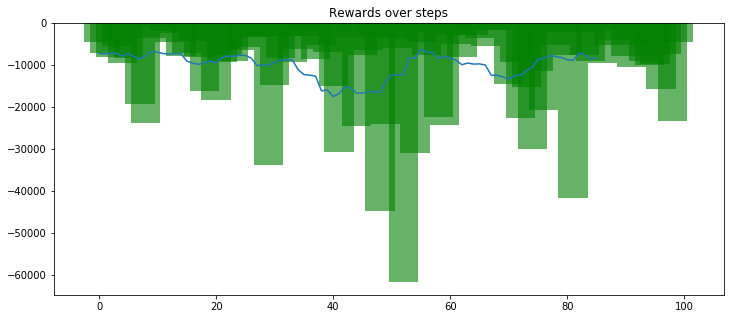

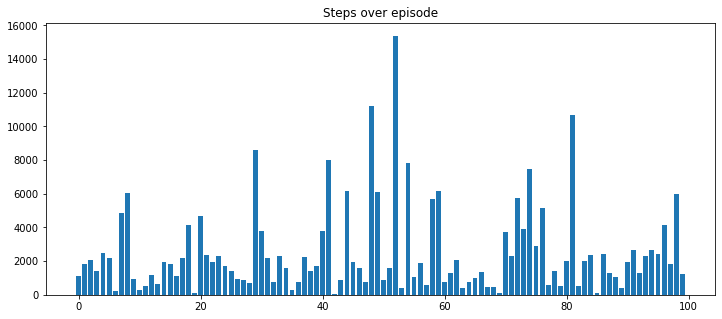

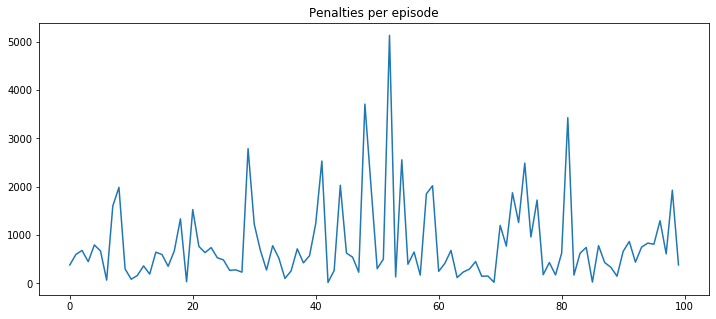

In [33]:
brute_force(100)